In [1]:
from zipfile import  ZipFile
file_name="emotion.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [2]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [3]:
TRAIN_DIR = "/content/train"
TEST_DIR = "/content/test"
BATCH_SIZE=64

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For training data, found 4830 in folder sad
For training data, found 4965 in folder neutral
For training data, found 3995 in folder angry
For training data, found 4097 in folder fear
For training data, found 436 in folder disgust
For training data, found 3171 in folder surprise
For training data, found 7215 in folder happy
For testing data, found 1247 in folder sad
For testing data, found 1233 in folder neutral
For testing data, found 958 in folder angry
For testing data, found 1024 in folder fear
For testing data, found 111 in folder disgust
For testing data, found 831 in folder surprise
For testing data, found 1774 in folder happy


In [12]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [24]:
class_names = ['angry','disgust','fear','happy','sad','surprise','neutral']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


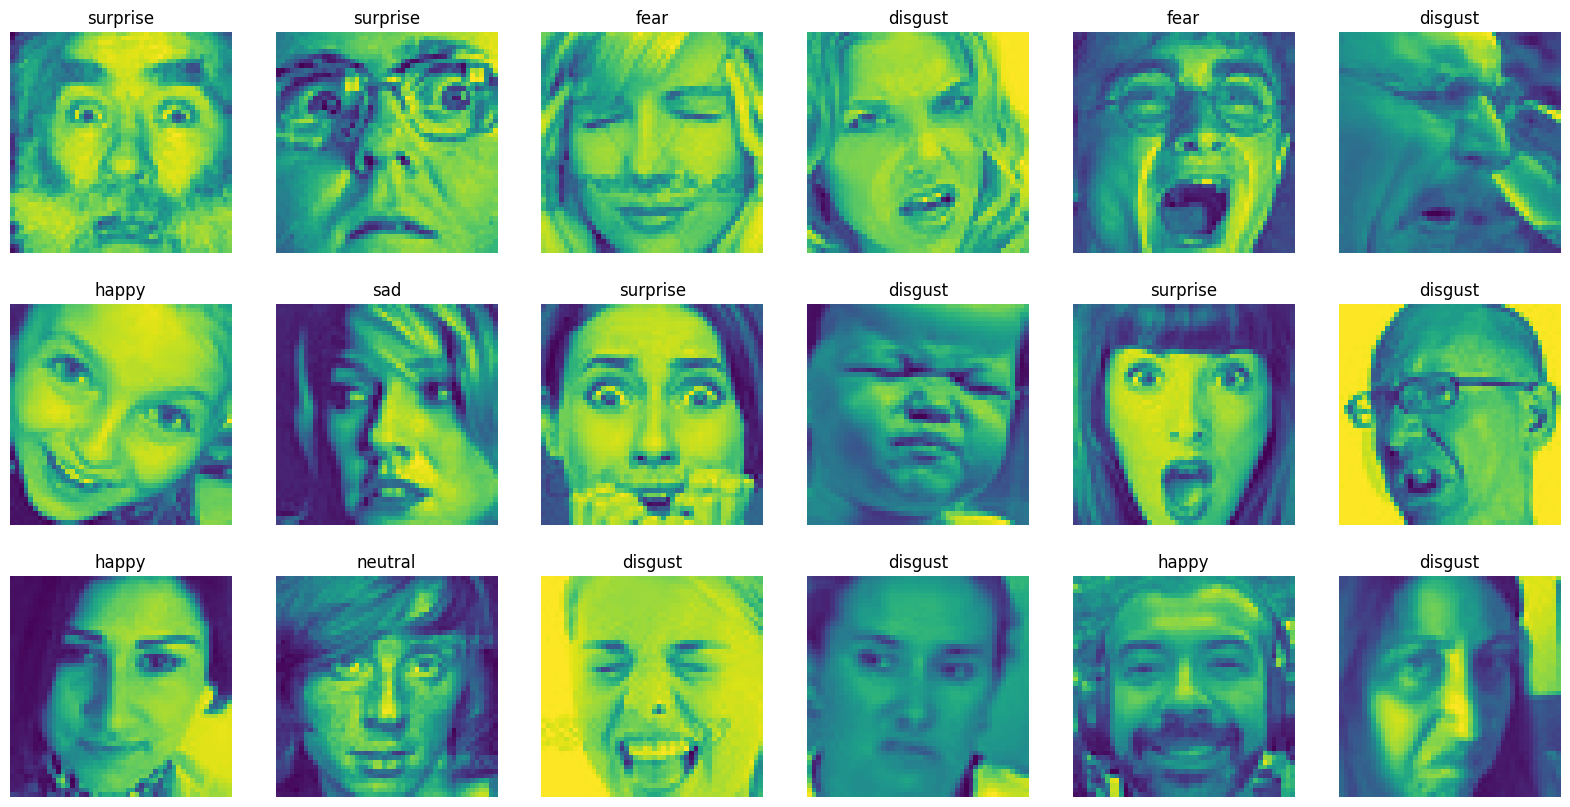

In [25]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/train/", target_class=class_name)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (48, 48),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (48, 48),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [30]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (48, 48, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 48, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
## model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 48)               

In [32]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
449/449 [==============================] - 80s 176ms/step - loss: 1.6998 - accuracy: 0.3269 - val_loss: 1.5561 - val_accuracy: 0.3989
Epoch 2/50
449/449 [==============================] - 74s 165ms/step - loss: 1.5485 - accuracy: 0.4042 - val_loss: 1.4587 - val_accuracy: 0.4362
Epoch 3/50
449/449 [==============================] - 72s 161ms/step - loss: 1.4676 - accuracy: 0.4374 - val_loss: 1.4010 - val_accuracy: 0.4614
Epoch 4/50
449/449 [==============================] - 74s 164ms/step - loss: 1.4267 - accuracy: 0.4538 - val_loss: 1.3686 - val_accuracy: 0.4760
Epoch 5/50
449/449 [==============================] - 73s 162ms/step - loss: 1.3909 - accuracy: 0.4697 - val_loss: 1.3585 - val_accuracy: 0.4755
Epoch 6/50
449/449 [==============================] - 74s 163ms/step - loss: 1.3616 - accuracy: 0.4795 - val_loss: 1.3250 - val_accuracy: 0.4896
Epoch 7/50
449/449 [==============================] - 78s 174ms/step - loss: 1.3349 - accuracy: 0.4900 - val_loss: 1.3077 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
classifier.evaluate(test_set)

113/113 [==============================] - 4s 38ms/step - loss: 1.2345 - accuracy: 0.5553


[1.2345480918884277, 0.5553078651428223]

Text(0, 0.5, 'Loss')

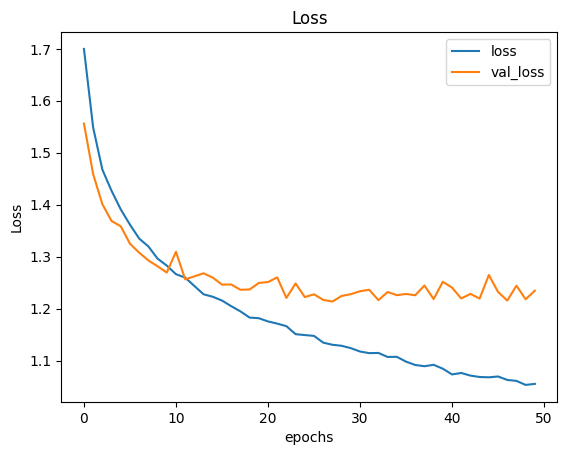

In [35]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

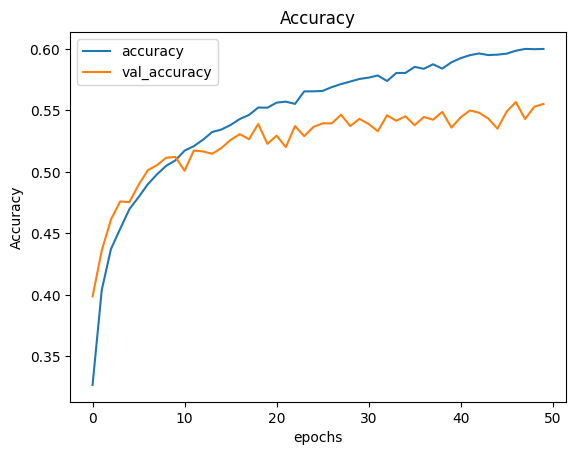

In [37]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [49]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/test/disgust/PrivateTest_3881740.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((48, 48))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 73ms/step


0

In [39]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}